In [8]:
import numpy
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def ageNetWorthData():

    random.seed(42)
    numpy.random.seed(42)

    ages = []
    for ii in range(100):
        ages.append( random.randint(20,65) )
    net_worths = [ii * 6.25 + numpy.random.normal(scale=40.) for ii in ages]
### need massage list into a 2d numpy array to get it to work in LinearRegression
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    from sklearn.cross_validation import train_test_split
    ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths)

    return ages_train, ages_test, net_worths_train, net_worths_test

In [6]:
# generate a model

ages_train, ages_test, net_worths_train, net_worths_test = ageNetWorthData()



from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(ages_train, net_worths_train)

### get Katie's net worth (she's 27)
### sklearn predictions are returned in an array, so you'll want to index into
### the output to get what you want, e.g. net_worth = predict([[27]])[0][0] (not
### exact syntax, the point is the [0] at the end). In addition, make sure the
### argument to your prediction function is in the expected format - if you get
### a warning about needing a 2d array for your data, a list of lists will be
### interpreted by sklearn as such (e.g. [[27]]).
km_net_worth = reg.predict([[27]])[0][0] ### fill in the line of code to get the right value

### get the slope
### again, you'll get a 2-D array, so stick the [0][0] at the end
slope = reg.coef_[0][0] ### fill in the line of code to get the right value

### get the intercept
### here you get a 1-D array, so stick [0] on the end to access
### the info we want
intercept = reg.intercept_[0] ### fill in the line of code to get the right value


### get the score on test data
test_score = reg.score(ages_test, net_worths_test) ### fill in the line of code to get the right value


### get the score on the training data
training_score = reg.score(ages_train, net_worths_train) ### fill in the line of code to get the right value



def submitFit():
    # all of the values in the returned dictionary are expected to be
    # numbers for the purpose of the grader.
    return {"networth":km_net_worth,
            "slope":slope,
            "intercept":intercept,
            "stats on test":test_score,
            "stats on training": training_score}

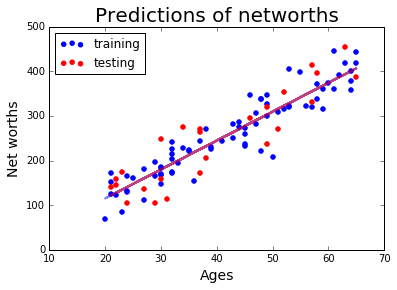

In [21]:
# visualizing regression
fig=plt.figure()

plt.scatter(ages_train, net_worths_train, color='blue', label="training")
plt.scatter(ages_test, net_worths_test, color='red', label="testing")
plt.plot(ages_train, reg.predict(ages_train), color = 'blue',linewidth=2,  alpha=0.5)
plt.plot(ages_test, reg.predict(ages_test), color = 'red', linewidth=2, alpha=0.5)

plt.title("Predictions of networths", fontsize=20)
plt.xlabel("Ages", fontsize=14)
plt.ylabel("Net worths", fontsize=14)
plt.legend(loc='upper left')
plt.show()  

### Calculate slope and intercept

In [44]:
import numpy as np

sleep = [5,6,7,8,10]
scores = [65,51,75,75,86]


def compute_regression(sleep,scores):

    #	First, compute the average amount of each list

    avg_sleep = np.mean(sleep)
    avg_scores = np.mean(scores)

    #	Then normalize the lists by subtracting the mean value from each entry

    normalized_sleep = [x - avg_sleep for x in sleep]
    normalized_scores = [x - avg_scores for x in scores]

    #	Compute the slope of the line by taking the sum over each student
    #	of the product of their normalized sleep times their normalized test score.
    #	Then divide this by the sum of squares of the normalized sleep times.

    slope = np.dot(normalized_sleep, normalized_scores) / np.sum([ x * x for x in normalized_sleep])

    #	Finally, We have a linear function of the form
    #	y - avg_y = slope * ( x - avg_x )
    #	Rewrite this function in the form
    #	y = m * x + b
    #	Then return the values m, b
    m = slope
    b = avg_scores - slope * avg_sleep
    
    return m,b


if __name__=="__main__":
    m,b = compute_regression(sleep,scores)
    print "Your linear model is y={}*x+{}".format(m,b)

Your linear model is y=5.51351351351*x+30.7027027027


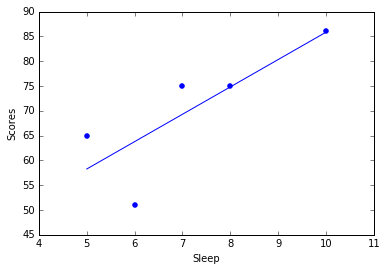

In [50]:
plt.scatter(sleep, scores, color='blue')

plt.plot(sleep, [(5.51351351351*x+30.7027027027) for x in sleep])
plt.xlabel('Sleep')
plt.ylabel('Scores')
plt.show()

### Limitation of a simple linear model

This is the limitation of extrapolating beyond the range of the data we have: we may get nonsensical answers, 
like infinite sleep leads to an infinitely better exam grade.

### One solution: polynomial regression

In [51]:
# use numpy ployfit function returns a vector of coefficients, highest power first
np.polyfit(sleep, scores, 2)

array([  0.43004418,  -0.97201767,  53.83210604])

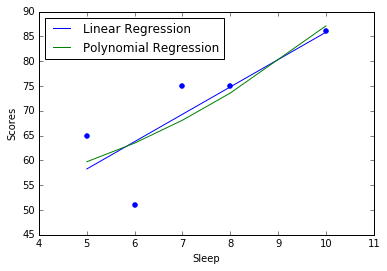

In [54]:
plt.scatter(sleep, scores, color='blue')

plt.plot(sleep, [(5.51351351351*x+30.7027027027) for x in sleep], label='Linear Regression')
plt.plot(sleep, [(0.43004418*x*x + -0.97201767*x+53.83210604) for x in sleep], label='Polynomial Regression')
plt.xlabel('Sleep')
plt.ylabel('Scores')

plt.legend(loc='upper left')
plt.show()